In [3]:
#https://setosa.io/ev/image-kernels/
import cv2
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf


122880/117948 [===============================] - 0s 0us/step
[INFO] applying small_blur kernel
[INFO] applying large_blur kernel
[INFO] applying sharpen kernel
[INFO] applying laplacian kernel
[INFO] applying sobel_x kernel
[INFO] applying sobel_y kernel


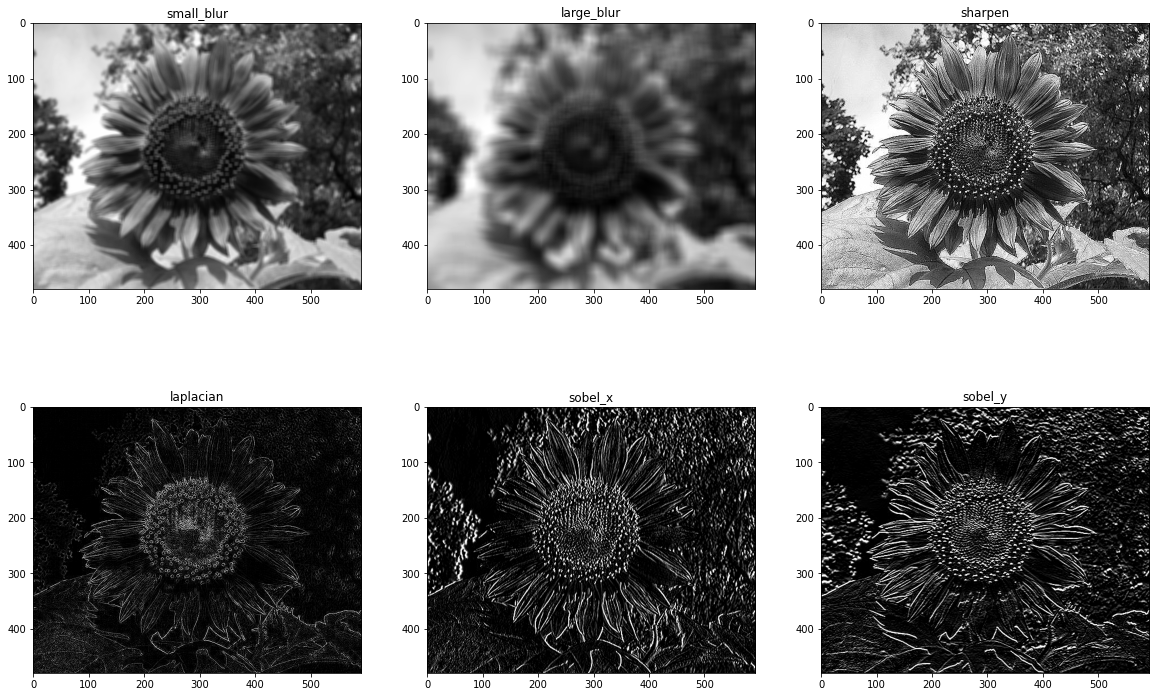

In [4]:
# construct the Laplacian kernel used to detect edge-like
# regions of an image
# construct average blurring kernels used to smooth an image
smallBlur = np.ones((7, 7), dtype="float") * (1.0 / (7 * 7))
largeBlur = np.ones((21, 21), dtype="float") * (1.0 / (21 * 21))
# construct a sharpening filter
sharpen = np.array((
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]), dtype="int")

laplacian = np.array((
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]), dtype="int")
# construct the Sobel x-axis kernel
sobelX = np.array((
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]), dtype="int")
# construct the Sobel y-axis kernel
sobelY = np.array((
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]), dtype="int")


kernelBank = (
    ("small_blur", smallBlur),
    ("large_blur", largeBlur),
    ("sharpen", sharpen),
    ("laplacian", laplacian),
    ("sobel_x", sobelX),
    ("sobel_y", sobelY)
)

fig = plt.figure(figsize=(20,20))
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)
gray = cv2.imread(sunflower_path, cv2.IMREAD_GRAYSCALE)
for i, (kernelName, kernel) in enumerate(kernelBank):
    print("[INFO] applying {} kernel".format(kernelName))
    dst = cv2.filter2D(gray, -1, kernel)
    ax = fig.add_subplot(3,3,i+1 )
    ax.set_title(kernelName)
    ax.imshow(dst, cmap="gray")